Homework 2 - Natalia Machlus index number: 273344

# <center> Classification

## 1. Introduction.

### 1.1 Dataset.

https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea

### 1.2 Presentation of the topic.

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

### 1.3 Attribute Description

Demographic:

- sex: male or female ("M" or "F")
- age: age of the patient (Continuous - although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    
Behavioral:  
    
- is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
- CigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical (history):
    
- BPMeds: whether or not the patient was on blood pressure medication (Nominal)
- prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
- prevalentHyp: whether or not the patient was hypertensive (Nominal)
- diabetes: whether or not the patient had diabetes (Nominal)

Medical (current):
    
- totChol: total cholesterol level (Continuous)
- sysBP: systolic blood pressure (Continuous)
- diaBP: diastolic blood pressure (Continuous)
- BMI: body mass index (Continuous)
- heartRate: heart rate (Continuous - in medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- glucose: glucose level (Continuous)

Predicted variable (desired target):

- TenYearCHD: 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

## 2. Data preprocessing.

### 2.1 Structure of data.

- getting the data

Note: I will only work on data called train which I will divide into train and test set because the data that is named test doesn't contain target column so It would be imposiible to assess performance of the classification models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../Inteligencja_obliczeniowa/train.csv")

In [3]:
df = data.copy() #I am working on a copy of original dataset

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
df.shape

(3390, 17)

There are 3390 rows and 17 columns in chosen dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

As can be seen from above there are some missing values in columns. Only columns is_smoking and sex have values as strings, values in other columns are all numeric (float or int).

- checking if there are any duplicates

In [8]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


As there are no duplicates I deleted column 'id' because each row is assigned to different person.

In [9]:
df.drop(['id'], axis='columns', inplace=True)

- summary for attributes

In [10]:
df.describe() #summary for numeric attributes

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


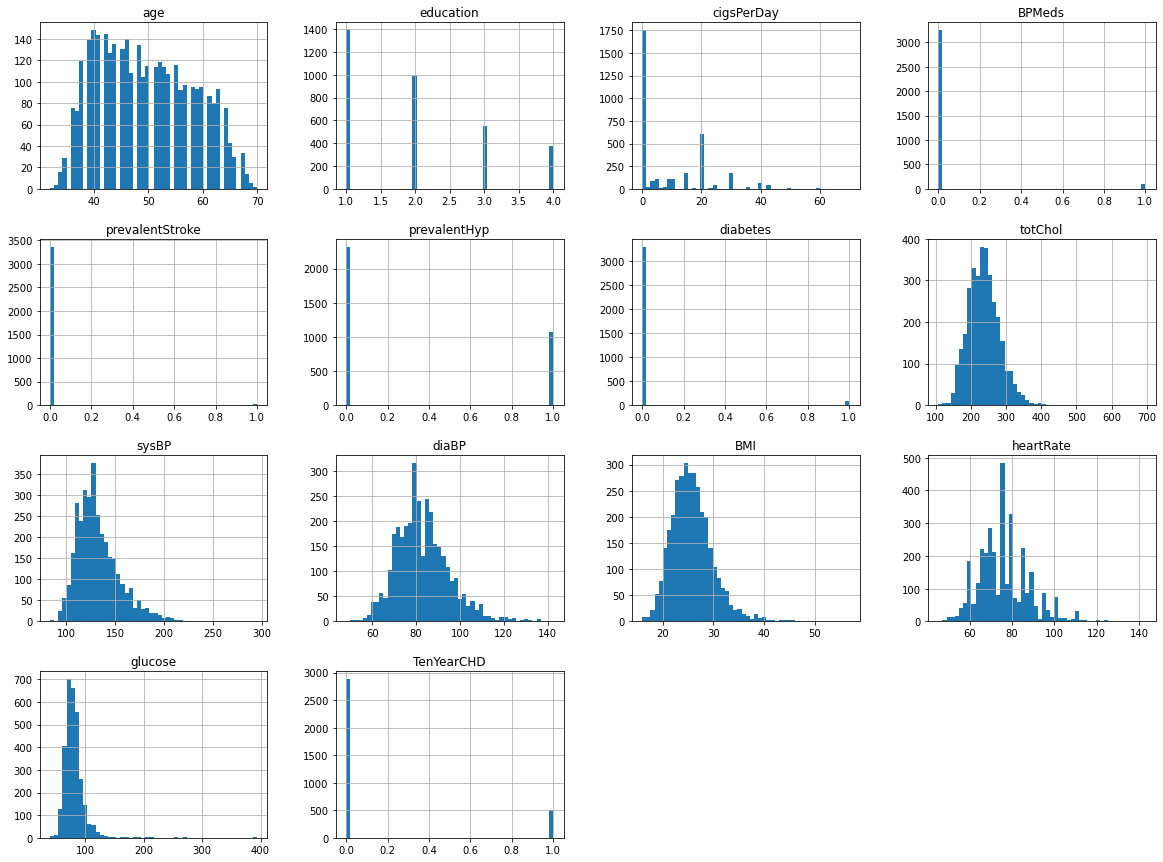

In [11]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

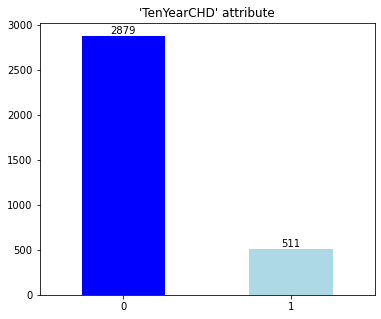

In [12]:
plt.figure(figsize=(6, 5))
ax = df["TenYearCHD"].value_counts().plot(kind="bar",color=["blue","lightblue"], rot=0)
rects = ax.patches
labels = [df["TenYearCHD"].value_counts()[0],df["TenYearCHD"].value_counts()[1]]

plt.title("'TenYearCHD' attribute")

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
plt.show()

Most of data describe younger patients what can be seen from first plot and its right-skewed distribution. The vast majority of patients never had a stroke, diabetes or were on blood pressure medication. This can cause sparsity in the dataset as features BPMeds, prevalentStroke, prevalentHyp, diabetes have low occurance of non-zero values. One way to deal with that is using Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining important information. Another important information is that the target attribute is imbalanced because there are much more patients without 10 year risk of coronary heart disease. That can cause some problems later while training models.

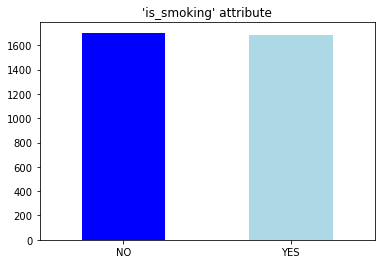

In [13]:
df["is_smoking"].value_counts().plot(kind="bar",color=["blue","lightblue"], rot=0)
plt.title("'is_smoking' attribute")
plt.show()

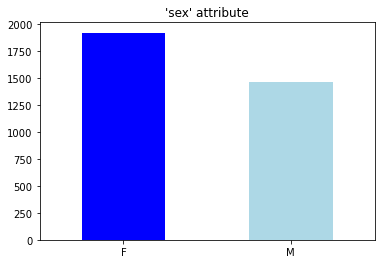

In [14]:
df["sex"].value_counts().plot(kind="bar",color=["blue","lightblue"], rot=0)
plt.title("'sex' attribute")
plt.show()

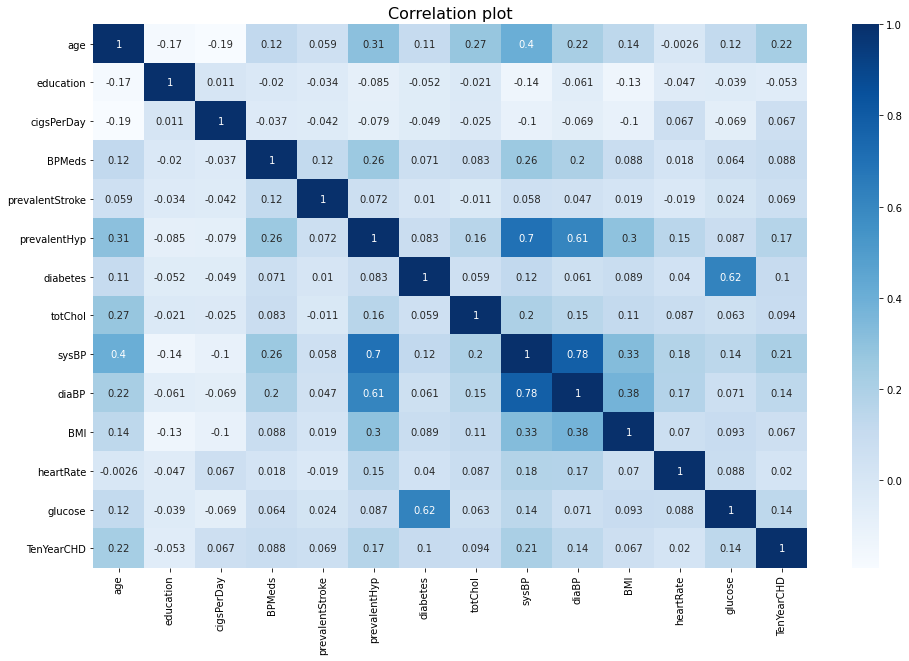

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation plot", size = 16)
plt.show()

Most correlated with the target are age and sysBP attributes.

### 2.2 Splitting to train and test sets.

In [16]:
X = df.drop("TenYearCHD", axis = 1)
y = df["TenYearCHD"].copy()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
y_train.value_counts()

0    2298
1     414
Name: TenYearCHD, dtype: int64

In [19]:
y_test.value_counts()

0    581
1     97
Name: TenYearCHD, dtype: int64

### 2.3 Preparing data for machine learninig algorithms.

#### 2.3.1 Missing data and categorical variables.

In [20]:
df.isnull().sum().sort_values(ascending = False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [21]:
X_train.isnull().sum().sort_values(ascending = False)

glucose            241
education           70
BPMeds              34
totChol             32
cigsPerDay          16
BMI                 11
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
dtype: int64

Columns where missing values will be replaced with median:
    
- glucose

- totChol

- cigsPerDay

- BMI

- heartRate

Columns where where missing values will be replaced with mode:
    
- education

- BPMeds

As I have read the best practice is to impute missing values using the mode or median from the training set and apply the same imputation technique on the test set. This ensures that the test set remains unseen during the training process and helps to provide an accurate evaluation of the model's performance.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings("ignore", category = FutureWarning)#filter out all FutureWarning messages

X_train_num = X_train.drop(["is_smoking","sex"], axis = 1) #dataframe with only numeric attributes

#will be raplaced with 0 and 1 by using OrdinalEncoder: in sex female -> 0 male -> 1, in is_smoking no -> 0 yes -> 1
cat_attributes = ["is_smoking", "sex"]

median_attributes = list(X_train_num.drop(["education","BPMeds"], axis = 1).columns) #names of attributes to fill NaN with median
mode_attributes = ["education","BPMeds"] #names of attributes to fill NaN with mode

full_pipeline = ColumnTransformer([
    ('median_imputer', SimpleImputer(strategy = "median"),median_attributes),
    ('mode_imputer', SimpleImputer(strategy='most_frequent'),mode_attributes),
    ("cat", OrdinalEncoder(), cat_attributes)
])

X_train_prep = full_pipeline.fit_transform(X_train)

In [23]:
X_train_transformed = pd.DataFrame(X_train_prep, columns = median_attributes + mode_attributes + cat_attributes, index = X_train.index)
#note that columns now are in different order

In [24]:
X_train_transformed.head() #dataframe without any NaN values and categorical values in attributes

,age,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education,BPMeds,is_smoking,sex
2378,66.0,0.0,0.0,1.0,0.0,290.0,152.5,90.0,23.63,80.0,76.0,1.0,1.0,0.0,0.0
3182,53.0,0.0,0.0,1.0,0.0,267.0,152.0,89.0,28.49,94.0,103.0,1.0,0.0,0.0,0.0
921,46.0,20.0,0.0,0.0,0.0,259.0,129.0,83.0,22.91,66.0,84.0,3.0,0.0,1.0,0.0
2244,40.0,50.0,0.0,0.0,0.0,220.0,124.0,79.0,20.70,90.0,57.0,1.0,0.0,1.0,0.0
3131,51.0,0.0,0.0,0.0,0.0,234.0,114.0,85.0,28.68,72.0,84.0,2.0,0.0,0.0,0.0


In [25]:
X_train_transformed.isnull().sum().sum() #now there are no NaN values intrain dataset

0

#### 2.3.2 Handling data imbalance.

One of the ways to deal with data imbalance is using RandomOverSampler function. It oversamples the minority class by randomly duplicating samples from the minority class until it reaches a balanced representation of the classes. Note that it's important to apply it only to the training set and not to the test set that's because oversampling the test set could result in overfitting and invalidate your model's ability to generalize to new, unseen data.

In [26]:
from imblearn.over_sampling import RandomOverSampler

# creating a RandomOverSampler object and fit it to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_transformed, y_train)

In [27]:
y_train_resampled.value_counts()

0    2298
1    2298
Name: TenYearCHD, dtype: int64

#### 2.3.3 Data standarization.

Scaling binary values does not change the values significantly since the mean and standard deviation for binary variables are fixed (mean=0.5, std=0.5) so I won't do it as it is generally not recommended to scale binary variables using StandardScaler. In fact, scaling binary features could even lead to a loss of information, as it could make it harder for the model to differentiate between the two categories.

In [28]:
X_train_resampled.head()

,age,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education,BPMeds,is_smoking,sex
0,66.0,0.0,0.0,1.0,0.0,290.0,152.5,90.0,23.63,80.0,76.0,1.0,1.0,0.0,0.0
1,53.0,0.0,0.0,1.0,0.0,267.0,152.0,89.0,28.49,94.0,103.0,1.0,0.0,0.0,0.0
2,46.0,20.0,0.0,0.0,0.0,259.0,129.0,83.0,22.91,66.0,84.0,3.0,0.0,1.0,0.0
3,40.0,50.0,0.0,0.0,0.0,220.0,124.0,79.0,20.70,90.0,57.0,1.0,0.0,1.0,0.0
4,51.0,0.0,0.0,0.0,0.0,234.0,114.0,85.0,28.68,72.0,84.0,2.0,0.0,0.0,0.0


In [29]:
from sklearn.preprocessing import StandardScaler

#specifing names of columns to be scaled and columns that won't be scaled
to_scale_cols = ["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","education"]
not_to_scale_cols = ["prevalentStroke","prevalentHyp","diabetes","BPMeds","is_smoking","sex"] #attributes with binary values

scaler = StandardScaler()

scaler.fit(X_train_resampled[to_scale_cols])

scaled_features = scaler.transform(X_train_resampled[to_scale_cols])

X_train_scaled_df = pd.DataFrame(scaled_features, index = X_train_resampled.index, columns = to_scale_cols)#scaled dataset

In [30]:
X_train_scaled = pd.concat([X_train_scaled_df, X_train_resampled[not_to_scale_cols]], axis=1) #merging scaled and unscaled dataset together

X_train_scaled.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education,prevalentStroke,prevalentHyp,diabetes,BPMeds,is_smoking,sex
0,1.627331,-0.770440,1.035861,0.657211,0.451729,-0.593702,0.324010,-0.274234,-0.875446,0.0,1.0,0.0,1.0,0.0,0.0
1,0.144469,-0.770440,0.546004,0.636043,0.371735,0.592160,1.497956,0.541331,-0.875446,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.653995,0.835174,0.375619,-0.337662,-0.108235,-0.769385,-0.849936,-0.032585,1.047397,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.338392,3.243595,-0.455009,-0.549337,-0.428215,-1.308635,1.162543,-0.848151,-0.875446,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.083663,-0.770440,-0.156835,-0.972687,0.051755,0.638521,-0.346816,-0.032585,0.085976,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.3.3 Two versions of datasets.

Now I will create two versions of datasets. On first dataframe I will perform Principal Component Analysis and the second one will remain as it is after scaling. That's how I will be later able to compare how my models work on different versions of datasets.

In [31]:
X_train_v1 = X_train_scaled.copy() #on that one I will perform PCA
X_train_v2 = X_train_scaled.copy() #this one will remain as it is

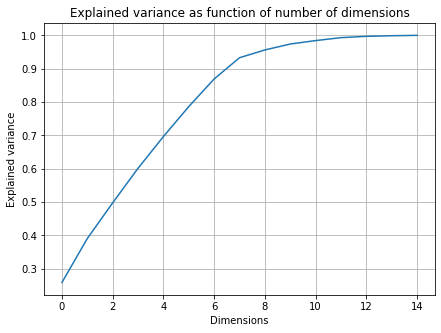

In [32]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(random_state = 42)
data_reduced = pca.fit_transform(X_train_v1)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(7, 5))
plt.plot(cumsum)
plt.title('Explained variance as function of number of dimensions')
plt.ylabel('Explained variance')
plt.xlabel('Dimensions')
plt.grid()

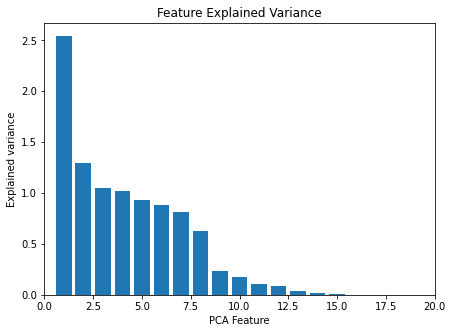

In [33]:
plt.figure(figsize=(7, 5))
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
plt.xlim([0,20])
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [34]:
pca_95 = PCA(n_components = 0.95, random_state = 42) #so that 95% of variance is explained
X_train_pca95 = pca_95.fit_transform(X_train_v1)
print(pca_95.explained_variance_ratio_)

X_train_v1 = pd.DataFrame(X_train_pca95,
                           index = X_train_v1.index)

[0.25858477 0.13186924 0.10701974 0.10372088 0.09514515 0.08991114
 0.08290681 0.06369061 0.0233365 ]


So the two versions of dataset are:

In [35]:
X_train_v1.head() #the one I used PCA on

,0,1,2,3,4,5,6,7,8
0,1.643231,-1.000610,0.207219,0.525822,-1.535545,0.331701,-0.728007,0.198767,0.125788
1,1.675101,-0.056026,0.203212,0.812099,0.118813,1.462499,0.171067,0.235866,0.266292
2,-1.177617,0.551780,0.776105,-0.512492,-0.096194,-1.042829,-0.080666,0.491272,0.403074
3,-2.038987,3.022943,-1.009103,0.938777,-0.938623,0.295184,-0.448897,0.563684,0.608874
4,-0.327422,-0.994535,0.046383,-0.297747,0.454239,0.414589,0.708895,-0.166577,-0.275029


In [36]:
X_train_v2.head() #only scaled

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education,prevalentStroke,prevalentHyp,diabetes,BPMeds,is_smoking,sex
0,1.627331,-0.770440,1.035861,0.657211,0.451729,-0.593702,0.324010,-0.274234,-0.875446,0.0,1.0,0.0,1.0,0.0,0.0
1,0.144469,-0.770440,0.546004,0.636043,0.371735,0.592160,1.497956,0.541331,-0.875446,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.653995,0.835174,0.375619,-0.337662,-0.108235,-0.769385,-0.849936,-0.032585,1.047397,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.338392,3.243595,-0.455009,-0.549337,-0.428215,-1.308635,1.162543,-0.848151,-0.875446,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.083663,-0.770440,-0.156835,-0.972687,0.051755,0.638521,-0.346816,-0.032585,0.085976,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Classification.

### 3.1 Decison Tree.

#### 3.1.1 Version 1 of Dataset (with PCA).

##### Training model

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dec_tree_clf = DecisionTreeClassifier(random_state=42) #instantiating the DecisionTreeClassifier

In [38]:
dec_tree_clf.fit(X_train_v1, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [39]:
from sklearn import tree                                                                                                                            

text_representation = tree.export_text(dec_tree_clf)
print(text_representation)

|--- feature_0 <= 0.39
|   |--- feature_4 <= 0.11
|   |   |--- feature_5 <= -0.06
|   |   |   |--- feature_8 <= 0.31
|   |   |   |   |--- feature_0 <= -1.43
|   |   |   |   |   |--- feature_6 <= 0.10
|   |   |   |   |   |   |--- feature_8 <= 0.16
|   |   |   |   |   |   |   |--- feature_3 <= 1.35
|   |   |   |   |   |   |   |   |--- feature_7 <= -2.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_7 >  -2.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3 >  1.35
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  0.16
|   |   |   |   |   |   |   |--- feature_8 <= 0.17
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_8 >  0.17
|   |   |   |   |   |   |   |   |--- feature_0 <= -2.26
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  -2.26
|   |   |   |   |   |   |   |   |   

##### Preparing test set

In [40]:
X_test_prep = full_pipeline.transform(X_test)

#test set without missing data and with all attributes with numeric values:
X_test_transformed = pd.DataFrame(X_test_prep, columns = median_attributes + mode_attributes + cat_attributes, index = X_test.index)

In [41]:
scaled_test_features = scaler.transform(X_test_transformed[to_scale_cols])
X_test_scaled_df = pd.DataFrame(scaled_test_features, index = X_test_transformed.index, columns = to_scale_cols)

X_test_scaled = pd.concat([X_test_scaled_df, X_test_transformed[not_to_scale_cols]], axis=1)

X_test_scaled.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education,prevalentStroke,prevalentHyp,diabetes,BPMeds,is_smoking,sex
134,1.399198,-0.770440,0.439513,0.424368,0.451729,0.109031,0.743276,2.655761,-0.875446,0.0,1.0,1.0,0.0,0.0,0.0
1764,-1.794657,0.835174,0.141339,-0.083652,0.811707,2.551515,-0.933789,-0.002379,0.085976,0.0,1.0,0.0,0.0,1.0,1.0
2465,1.056999,0.273209,1.504421,-1.142028,-1.468149,0.052910,-0.682229,0.329888,-0.875446,0.0,0.0,0.0,0.0,1.0,1.0
1987,-0.083663,-0.770440,-0.178133,-0.718677,-0.268225,0.533599,0.324010,-0.304441,0.085976,0.0,0.0,0.0,0.0,0.0,0.0
1295,0.828867,0.835174,-0.199432,0.614876,2.051628,0.201753,-0.682229,-0.485677,2.008818,0.0,1.0,0.0,0.0,1.0,1.0


In [42]:
X_test_pca95 = pca_95.transform(X_test_scaled)

X_test_v1 = pd.DataFrame(X_test_pca95, index = X_test_scaled.index) #version 1 of test set, where PCA was used
X_test_v2 = X_test_scaled.copy() #version 2 of test set, only scaled

##### Prediction

In [43]:
y_pred_train_v1 = dec_tree_clf.predict(X_train_v1)
y_pred_v1 = dec_tree_clf.predict(X_test_v1)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v1))
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_v1))
print("Classification Report:\n", classification_report(y_test, y_pred_v1))

Accuracy on train set: 1.0

Accuracy on test set: 0.7330383480825958
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       581
           1       0.13      0.15      0.14        97

    accuracy                           0.73       678
   macro avg       0.49      0.49      0.49       678
weighted avg       0.75      0.73      0.74       678



Precision = the proportion of true positive predictions (TP) out of all positive predictions (TP + FP).

Here precision for class 0 is 0.85, meaning that out of all the instances the model predicted to be in class 0, 85% were actually in class 0. Model works worse when identifing patients with target variable = 1 because the precision value indicates that only 13% of all the instances the model predicted to be in class 1 were actually that class 1. It seems like the model has overfitted to training data and it won't perform that well on unseen data.

In [45]:
results = pd.DataFrame(columns=['DecisionTree_1','DecisionTree_2', 'Naive_Bayes_1','Naive_Bayes_2','KNN_3','KNN_5','KNN_11','KNN','Neural_Network_1','Neural_Network_2'], index=['version_1', 'version_2'])

In [46]:
results.loc['version_1', 'DecisionTree_1'] = round((accuracy_score(y_test, y_pred_v1))*100,2)

In [47]:
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


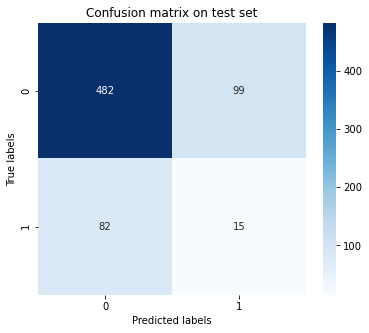

In [48]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v1)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix on test set')
plt.show()

#Classifier correctly predicted 482 patients not to have risk of disease
#Classifier incorrectly predicted 99 patients to have risk of disease
#Classifier incorrectly predicted 82 patients not to have risk of disease
#Classifier correctly predicted 15 patients to have risk of disease

#### GridSearchCV

GridSearchCV is a function that performs search over a specified hyperparameter space for a given estimator and evaluates its performance using cross-validation. In grid search, cross-validation is used to evaluate the performance of different hyperparameter combinations. For each combination of hyperparameters, the data is split into k folds, and the model is trained and evaluated k times using each fold as a test set once.

In [55]:
from sklearn.model_selection import GridSearchCV
#max_depth: the maximum depth of the tree
#min_samples_split: the minimum number of samples required to split an internal node
#min_samples_leaf: the minimum number of samples required to be at a leaf node
#max_features: the number of features to consider when looking for the best split:

              
param_grid = {'max_depth': [3, 4, 5],
              'min_samples_split': [5, 10, 20],
              'min_samples_leaf': [5, 10, 20],
              'max_features': [*range(1, len(X_train_v2.columns) + 1)],
             }

dec_tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(dec_tree_clf, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_v1, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20]},
             scoring='accuracy')

In [56]:
grid_search_df = pd.DataFrame(grid_search.cv_results_)
grid_search_df[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.596398,0.036596
1,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.623583,0.019254
2,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.619027,0.026536
3,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.604664,0.025724
4,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.605537,0.029304
...,...,...,...
400,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.703877,0.011381
401,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.704529,0.011214
402,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.701701,0.012479
403,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.701701,0.012479


In [57]:
grid_search.best_params_ #best found parameters for DecisionTreeClassifier by grid_search

{'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [58]:
final_model_v1 = grid_search.best_estimator_

final_model_v1_params = final_model_v1.get_params()
final_training_v1 = final_model_v1.fit(X_train_v1,y_train_resampled)

Train set accuracy:

In [59]:
y_train_preds =  final_model_v1.predict(X_train_v1)

accuracy_score(y_train_resampled,y_train_preds)

0.7395561357702349

Test set accuracy:

In [60]:
y_pred_v1 = final_model_v1.predict(X_test_v1)

# calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_v1)

print("Classification Report:\n", classification_report(y_test, y_pred_v1))
print("Accuracy: {}".format(acc_score))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78       581
           1       0.25      0.64      0.36        97

    accuracy                           0.67       678
   macro avg       0.58      0.66      0.57       678
weighted avg       0.82      0.67      0.72       678

Accuracy: 0.672566371681416


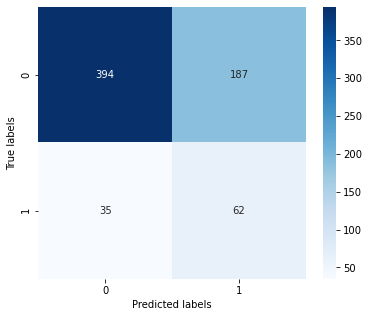

In [62]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v1)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 394 patients not to have risk of disease
#Classifier incorrectly predicted 187 patients to have risk of disease
#Classifier incorrectly predicted 35 patients not to have risk of disease
#Classifier correctly predicted 62 patients to have risk of disease

Model with 74% accuracy on the training set and 68% on the test set has a smaller gap between the training and test accuracy. This suggests that it is less overfit to the training data and may generalize better to new, unseen data, which is important for making accurate predictions on future data.

In [63]:
results.loc['version_1', 'DecisionTree_2'] = round((accuracy_score(y_test, y_pred_v1))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.1.2 Version 2 of dataset (only scaled).

##### Training model

In [64]:
dec_tree_clf = DecisionTreeClassifier(random_state=42) #instantiating the DecisionTreeClassifier

In [65]:
dec_tree_clf.fit(X_train_v2, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [66]:
from sklearn import tree                                                                                                                            

text_representation = tree.export_text(dec_tree_clf)
print(text_representation)

|--- feature_0 <= -0.37
|   |--- feature_1 <= 0.63
|   |   |--- feature_4 <= 1.19
|   |   |   |--- feature_2 <= 3.98
|   |   |   |   |--- feature_6 <= 0.20
|   |   |   |   |   |--- feature_7 <= 0.28
|   |   |   |   |   |   |--- feature_2 <= -1.30
|   |   |   |   |   |   |   |--- feature_7 <= -0.18
|   |   |   |   |   |   |   |   |--- feature_2 <= -1.75
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  -1.75
|   |   |   |   |   |   |   |   |   |--- feature_4 <= -1.17
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -0.72
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  -0.72
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_4 >  -1.17
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= -1.17
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   | 

##### Prediction

In [67]:
y_pred_train_v2 = dec_tree_clf.predict(X_train_v2)
y_pred_v2 = dec_tree_clf.predict(X_test_v2)

In [68]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v1))
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_v2))
print("Classification Report:\n", classification_report(y_test, y_pred_v2))

Accuracy on train set: 1.0

Accuracy on test set: 0.7684365781710915
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       581
           1       0.20      0.21      0.20        97

    accuracy                           0.77       678
   macro avg       0.53      0.53      0.53       678
weighted avg       0.77      0.77      0.77       678



It is probable that the model here has also overfitted to training data.

In [69]:
results.loc['version_2', 'DecisionTree_1'] = round((accuracy_score(y_test, y_pred_v2))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version_2,76.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


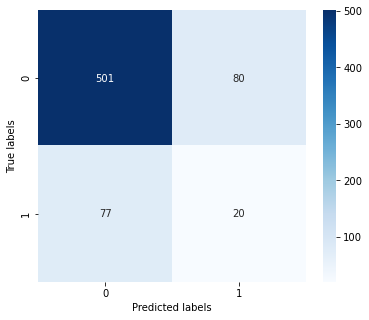

In [70]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v2)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 501 patients not to have risk of disease
#Classifier incorrectly predicted 80 patients to have risk of disease
#Classifier incorrectly predicted 77 patients not to have risk of disease
#Classifier correctly predicted 20 patients to have risk of disease

#### GridSearchCV

In [77]:
param_grid = {'max_depth': [3, 4, 5],
              'min_samples_split': [5, 10, 20],
              'min_samples_leaf': [5, 10, 20],
              'max_features': [*range(1, len(X_train_v2.columns) + 1)],
             }

dec_tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(dec_tree_clf, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_v2, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20]},
             scoring='accuracy')

In [78]:
grid_search_df = pd.DataFrame(grid_search.cv_results_)
grid_search_df[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.588769,0.045101
1,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.567237,0.014490
2,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.583339,0.023994
3,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.590510,0.048103
4,"{'max_depth': 3, 'max_features': 1, 'min_sampl...",0.596825,0.025965
...,...,...,...
400,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.700177,0.012421
401,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.700177,0.012421
402,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.697999,0.015753
403,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.697999,0.015753


In [79]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [80]:
final_model_v2 = grid_search.best_estimator_

final_model_v2_params = final_model_v2.get_params()
final_training_v2 = final_model_v2.fit(X_train_v2,y_train_resampled)

Train set accuracy:

In [81]:
y_train_preds =  final_model_v2.predict(X_train_v2)

accuracy_score(y_train_resampled,y_train_preds)

0.7249782419495213

Test set accuracy:

In [82]:
y_pred_v2 = final_model_v2.predict(X_test_v2)

# calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_v2)

print("Accuracy: {}".format(acc_score))
print("Classification Report:\n", classification_report(y_test, y_pred_v2))

Accuracy: 0.6696165191740413
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.78       581
           1       0.22      0.52      0.31        97

    accuracy                           0.67       678
   macro avg       0.56      0.61      0.55       678
weighted avg       0.80      0.67      0.72       678



In [83]:
results.loc['version_2', 'DecisionTree_2'] = round((accuracy_score(y_test, y_pred_v2))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version_2,76.84,66.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


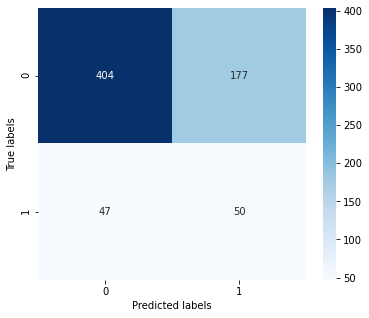

In [85]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v2)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 404 patients not to have risk of disease
#Classifier incorrectly predicted 177 patients to have risk of disease
#Classifier incorrectly predicted 47 patients not to have risk of disease
#Classifier correctly predicted 50 patients to have risk of disease

#### 3.1.3 Comparison of models:

In [86]:
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version_2,76.84,66.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When using simple model of DecisionTreeClassifier the model has overfitted to training data in both version of datasets but higher accuracy on test set has model used on second version of dataset(scaled one without using PCA). When I used GridSearchCV for searching parameters the model obtained for first version of dataset(this one where PCA was used on) had higher accuracy and it had better results when predicting class 1. 

### 3.2 Naive Bayes.

#### 3.2.1 Version 1 of Dataset (with PCA).

##### Training model

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
clf_Bayes = GaussianNB()

In [89]:
clf_Bayes.fit(X_train_v1, y_train_resampled)

GaussianNB()

##### Prediction

In [90]:
y_pred_train_v1 = clf_Bayes.predict(X_train_v1)
y_pred_v1 = clf_Bayes.predict(X_test_v1)

In [91]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v1))
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_v1))
print(classification_report(y_test,y_pred_v1))

Accuracy on train set: 0.662532637075718

Accuracy on test set: 0.7374631268436578
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       581
           1       0.29      0.60      0.39        97

    accuracy                           0.74       678
   macro avg       0.61      0.68      0.61       678
weighted avg       0.83      0.74      0.77       678



In [92]:
results.loc['version_1', 'Naive_Bayes_1'] = round((accuracy_score(y_test, y_pred_v1))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version_2,76.84,66.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


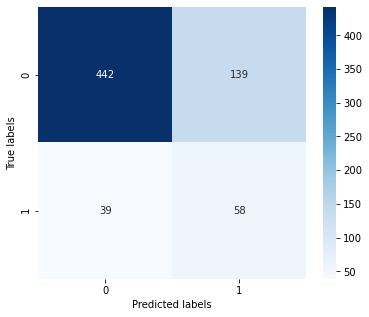

In [93]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v1)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 442 patients not to have risk of disease
#Classifier incorrectly predicted 139 patients to have risk of disease
#Classifier incorrectly predicted 39 patients not to have risk of disease
#Classifier correctly predicted 58 patients to have risk of disease

#### GridSearchCV

In [94]:
#var_smoothing: portion of the largest variance of all features that is added to variances for calculation stability.
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
             }
clf_Bayes =  GaussianNB()

grid_search = GridSearchCV(clf_Bayes, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_v1, y_train_resampled)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

In [95]:
grid_search_df = pd.DataFrame(grid_search.cv_results_)
grid_search_df[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,{'var_smoothing': 1e-09},0.658834,0.010181
1,{'var_smoothing': 1e-08},0.658834,0.010181
2,{'var_smoothing': 1e-07},0.658834,0.010181
3,{'var_smoothing': 1e-06},0.658834,0.010181
4,{'var_smoothing': 1e-05},0.658834,0.010181
5,{'var_smoothing': 0.0001},0.659051,0.010210
6,{'var_smoothing': 0.001},0.659269,0.009898
7,{'var_smoothing': 0.01},0.661227,0.009621
8,{'var_smoothing': 0.1},0.654699,0.009133


In [96]:
grid_search.best_params_

{'var_smoothing': 0.01}

In [97]:
final_model_v1 = grid_search.best_estimator_

final_model_v1_params = final_model_v1.get_params()
final_training_v1 = final_model_v1.fit(X_train_v1,y_train_resampled)

Train set accuracy:

In [98]:
y_train_preds =  final_model_v1.predict(X_train_v1)

accuracy_score(y_train_resampled,y_train_preds)

0.6590513489991296

Test set accuracy:

In [99]:
y_pred_v1 = final_model_v1.predict(X_test_v1)

# calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_v1)

print("Accuracy: {}".format(acc_score))
print("Classification Report:\n", classification_report(y_test, y_pred_v1))

Accuracy: 0.7448377581120944
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       581
           1       0.30      0.59      0.40        97

    accuracy                           0.74       678
   macro avg       0.61      0.68      0.62       678
weighted avg       0.83      0.74      0.78       678



In [100]:
results.loc['version_1', 'Naive_Bayes_2'] = round((accuracy_score(y_test, y_pred_v1))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,NaN,NaN,NaN,NaN,NaN,NaN
version_2,76.84,66.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


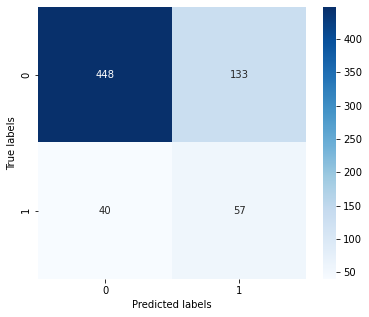

In [101]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v1)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 448 patients not to have risk of disease
#Classifier incorrectly predicted 133 patients to have risk of disease
#Classifier incorrectly predicted 40 patients not to have risk of disease
#Classifier correctly predicted 57 patients to have risk of disease

#### 3.2.2 Version 2 of dataset (only scaled).

##### Training model

In [102]:
clf_Bayes = GaussianNB()

In [103]:
clf_Bayes.fit(X_train_v2, y_train_resampled)

GaussianNB()

##### Prediction

In [104]:
y_pred_train_v2 = clf_Bayes.predict(X_train_v2)
y_pred_v2 = clf_Bayes.predict(X_test_v2)

In [105]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v2))
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_v2))
print(classification_report(y_test,y_pred_v2))

Accuracy on train set: 0.59029590948651

Accuracy on test set: 0.8185840707964602
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       581
           1       0.34      0.29      0.31        97

    accuracy                           0.82       678
   macro avg       0.61      0.60      0.60       678
weighted avg       0.81      0.82      0.81       678



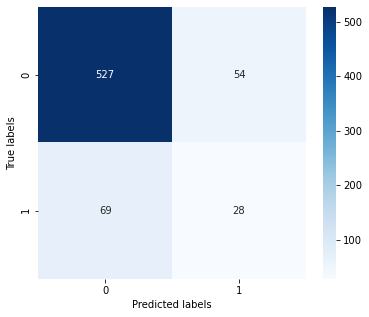

In [106]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v2)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 527 patients not to have risk of disease
#Classifier incorrectly predicted 54 patients to have risk of disease
#Classifier incorrectly predicted 69 patients not to have risk of disease
#Classifier correctly predicted 28 patients to have risk of disease

In [107]:
results.loc['version_2', 'Naive_Bayes_1'] = round((accuracy_score(y_test, y_pred_v2))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,NaN,NaN,NaN,NaN,NaN,NaN
version_2,76.84,66.96,81.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### GridSearchCV

In [108]:
#var_smoothing: portion of the largest variance of all features that is added to variances for calculation stability.
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
             }
clf_Bayes =  GaussianNB()

grid_search = GridSearchCV(clf_Bayes, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_v2, y_train_resampled)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

In [109]:
grid_search_df = pd.DataFrame(grid_search.cv_results_)
grid_search_df[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,{'var_smoothing': 1e-09},0.588989,0.012253
1,{'var_smoothing': 1e-08},0.588989,0.012253
2,{'var_smoothing': 1e-07},0.588989,0.012253
3,{'var_smoothing': 1e-06},0.588989,0.012253
4,{'var_smoothing': 1e-05},0.588989,0.012253
5,{'var_smoothing': 0.0001},0.588337,0.011881
6,{'var_smoothing': 0.001},0.588120,0.011095
7,{'var_smoothing': 0.01},0.598563,0.011238
8,{'var_smoothing': 0.1},0.626632,0.006262


In [110]:
grid_search.best_params_

{'var_smoothing': 0.1}

In [111]:
final_model_v2 = grid_search.best_estimator_

final_model_v2_params = final_model_v2.get_params()
final_training_v2 = final_model_v2.fit(X_train_v2,y_train_resampled)

Train set accuracy:

In [112]:
y_train_preds =  final_model_v2.predict(X_train_v2)

accuracy_score(y_train_resampled,y_train_preds)

0.6288076588337685

Test set accuracy:

In [113]:
y_pred_v2 = final_model_v2.predict(X_test_v2)

# calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_v2)

print("Accuracy: {}".format(acc_score))
print("Classification Report:\n", classification_report(y_test, y_pred_v2))

Accuracy: 0.7935103244837758
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       581
           1       0.32      0.39      0.35        97

    accuracy                           0.79       678
   macro avg       0.61      0.63      0.61       678
weighted avg       0.81      0.79      0.80       678



In [114]:
results.loc['version_2', 'Naive_Bayes_2'] = round((accuracy_score(y_test, y_pred_v2))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,NaN,NaN,NaN,NaN,NaN,NaN
version_2,76.84,66.96,81.86,79.35,NaN,NaN,NaN,NaN,NaN,NaN


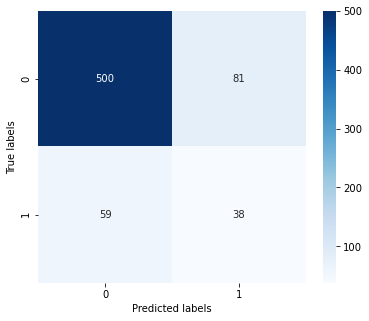

In [115]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v2)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 500 patients not to have risk of disease
#Classifier incorrectly predicted 81 patients to have risk of disease
#Classifier incorrectly predicted 59 patients not to have risk of disease
#Classifier correctly predicted 38 patients to have risk of disease

#### 3.2.3 Comparison of models:

In [116]:
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,NaN,NaN,NaN,NaN,NaN,NaN
version_2,76.84,66.96,81.86,79.35,NaN,NaN,NaN,NaN,NaN,NaN


When using simple model of GaussianNB the model used on second version of dataset(scaled one without using PCA) had higher accuracy on test set. When I used GridSearchCV for searching parameters also the model obtained for the second version of dataset had higher accuracy and had better results when predicting class 0 but worse results in predicting class 1 from model used on first dataset . 

### 3.3 K-Nearest Neighbours.

#### 3.3.1 Version 1 of Dataset (with PCA).

- k = 3

##### Training model

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [118]:
knn_3.fit(X_train_v1, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

##### Prediction

In [119]:
y_pred_train_v1 = knn_3.predict(X_train_v1)
y_pred_v1 = knn_3.predict(X_test_v1)

In [120]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v1))
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_v1))
print("Classification Report:\n", classification_report(y_test, y_pred_v1))

Accuracy on train set: 0.9351610095735422

Accuracy on test set: 0.7064896755162242
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       581
           1       0.19      0.32      0.24        97

    accuracy                           0.71       678
   macro avg       0.53      0.55      0.53       678
weighted avg       0.77      0.71      0.74       678



The accuracy of 93% on train set and 70% accuracy on test set may indicate overfitting to training set.

In [121]:
results.loc['version_1', 'KNN_3'] = round((accuracy_score(y_test, y_pred_v1))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,NaN,NaN,NaN,NaN,NaN
version_2,76.84,66.96,81.86,79.35,NaN,NaN,NaN,NaN,NaN,NaN


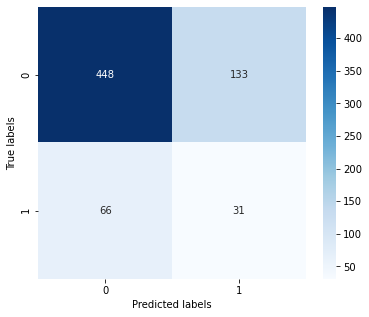

In [122]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v1)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 448 patients not to have risk of disease
#Classifier incorrectly predicted 133 patients to have risk of disease
#Classifier incorrectly predicted 66 patients not to have risk of disease
#Classifier correctly predicted 31 patients to have risk of disease

- k = 5

##### Training model

In [123]:
knn_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [124]:
knn_5.fit(X_train_v1, y_train_resampled)

KNeighborsClassifier(metric='euclidean')

##### Prediction

In [125]:
y_pred_train_v1 = knn_5.predict(X_train_v1)
y_pred_v1 = knn_5.predict(X_test_v1)

In [126]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v1))
print("\nAccuracy on test set", accuracy_score(y_test, y_pred_v1))
print("Classification Report:\n", classification_report(y_test, y_pred_v1))

Accuracy on train set: 0.8822889469103569

Accuracy on test set 0.640117994100295
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76       581
           1       0.17      0.40      0.24        97

    accuracy                           0.64       678
   macro avg       0.52      0.54      0.50       678
weighted avg       0.77      0.64      0.69       678



The model has probably overfitted to training data.

In [127]:
results.loc['version_1', 'KNN_5'] = round((accuracy_score(y_test, y_pred_v1))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,NaN,NaN,NaN,NaN
version_2,76.84,66.96,81.86,79.35,NaN,NaN,NaN,NaN,NaN,NaN


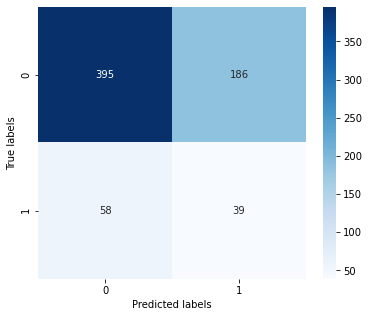

In [128]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v1)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 395 patients not to have risk of disease
#Classifier incorrectly predicted 186 patients to have risk of disease
#Classifier incorrectly predicted 58 patients not to have risk of disease
#Classifier correctly predicted 39 patients to have risk of disease

- k = 11

##### Training model

In [129]:
knn_11 = KNeighborsClassifier(n_neighbors=11, metric='euclidean')

In [130]:
knn_11.fit(X_train_v1, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

##### Prediction

In [131]:
y_pred_train_v1 = knn_11.predict(X_train_v1)
y_pred_v1 = knn_11.predict(X_test_v1)

In [132]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v1))
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_v1))
print("Classification Report:\n", classification_report(y_test, y_pred_v1))

Accuracy on train set: 0.7811140121845083

Accuracy on test set: 0.6327433628318584
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75       581
           1       0.20      0.54      0.29        97

    accuracy                           0.63       678
   macro avg       0.55      0.59      0.52       678
weighted avg       0.79      0.63      0.69       678



Not that big difference between accuracy on train set and test set may mean that the model is not that overfitted.

In [133]:
results.loc['version_1', 'KNN_11'] = round((accuracy_score(y_test, y_pred_v1))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,NaN,NaN,NaN
version_2,76.84,66.96,81.86,79.35,NaN,NaN,NaN,NaN,NaN,NaN


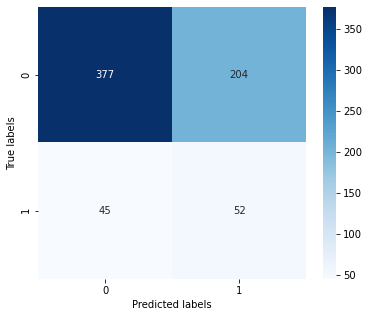

In [134]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v1)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 377 patients not to have risk of disease
#Classifier incorrectly predicted 204 patients to have risk of disease
#Classifier incorrectly predicted 45 patients not to have risk of disease
#Classifier correctly predicted 52 patients to have risk of disease

In [135]:
param_grid = {'n_neighbors':[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]
             }
knn = KNeighborsClassifier(metric='euclidean')

grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_v1, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy')

In [136]:
grid_search_df = pd.DataFrame(grid_search.cv_results_)
grid_search_df[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,{'n_neighbors': 1},0.919497,0.004929
1,{'n_neighbors': 2},0.908403,0.010782
2,{'n_neighbors': 3},0.849437,0.007993
3,{'n_neighbors': 4},0.824198,0.010668
4,{'n_neighbors': 5},0.791781,0.013440
5,{'n_neighbors': 6},0.767192,0.014652
6,{'n_neighbors': 7},0.746958,0.012855
7,{'n_neighbors': 8},0.740867,0.017518
8,{'n_neighbors': 9},0.726940,0.013422
9,{'n_neighbors': 10},0.728899,0.011320


In [137]:
grid_search.best_params_

{'n_neighbors': 1}

In [138]:
final_model_v1 = grid_search.best_estimator_

final_model_v1_params = final_model_v1.get_params()
final_training_v1 = final_model_v1.fit(X_train_v1,y_train_resampled)

Train set accuracy:

In [139]:
y_train_preds =  final_model_v1.predict(X_train_v1)

accuracy_score(y_train_resampled,y_train_preds)

1.0

Train set accuracy:

In [140]:
y_pred_v1 = final_model_v1.predict(X_test_v1)

# calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_v1)

print("Accuracy: {}".format(acc_score))
print("Classification Report:\n", classification_report(y_test, y_pred_v1))

Accuracy: 0.7846607669616519
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       581
           1       0.22      0.20      0.21        97

    accuracy                           0.78       678
   macro avg       0.54      0.54      0.54       678
weighted avg       0.78      0.78      0.78       678



In [141]:
results.loc['version_1', 'KNN'] = round((accuracy_score(y_test, y_pred_v1))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,NaN,NaN
version_2,76.84,66.96,81.86,79.35,NaN,NaN,NaN,NaN,NaN,NaN


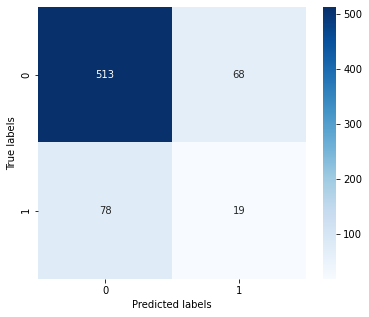

In [142]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v1)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 513 patients not to have risk of disease
#Classifier incorrectly predicted 68 patients to have risk of disease
#Classifier incorrectly predicted 78 patients not to have risk of disease
#Classifier correctly predicted 19 patients to have risk of disease

#### 3.2.2 Version 2 of dataset (only scaled).

- k = 3

##### Training model

In [143]:
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [144]:
knn_3.fit(X_train_v2, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

##### Prediction

In [145]:
y_pred_train_v2 = knn_3.predict(X_train_v2)
y_pred_v2 = knn_3.predict(X_test_v2)

In [146]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v2))
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_v2))
print("Classification Report:\n", classification_report(y_test, y_pred_v2))

Accuracy on train set: 0.9358137510879025

Accuracy on test set: 0.7094395280235988
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       581
           1       0.20      0.34      0.25        97

    accuracy                           0.71       678
   macro avg       0.54      0.56      0.54       678
weighted avg       0.78      0.71      0.74       678



Accuracy on train and test set may indicate that the model has probably overfitted to trainig set.

In [147]:
results.loc['version_2', 'KNN_3'] = round((accuracy_score(y_test, y_pred_v2))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,NaN,NaN
version_2,76.84,66.96,81.86,79.35,70.94,NaN,NaN,NaN,NaN,NaN


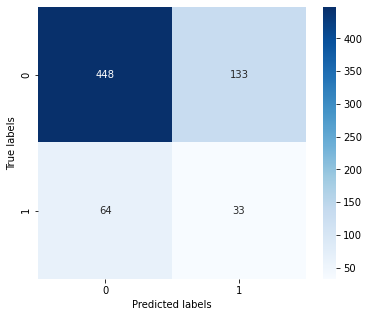

In [148]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v2)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 448 patients not to have risk of disease
#Classifier incorrectly predicted 133 patients to have risk of disease
#Classifier incorrectly predicted 64 patients not to have risk of disease
#Classifier correctly predicted 33 patients to have risk of disease

- k = 5

##### Training model

In [149]:
knn_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [150]:
knn_5.fit(X_train_v2, y_train_resampled)

KNeighborsClassifier(metric='euclidean')

##### Prediction

In [151]:
y_pred_train_v2 = knn_5.predict(X_train_v2)
y_pred_v2 = knn_5.predict(X_test_v2)

In [152]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v2))
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_v2))
print("Classification Report:\n", classification_report(y_test, y_pred_v2))

Accuracy on train set: 0.8855526544821584

Accuracy on test set: 0.6651917404129793
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78       581
           1       0.21      0.49      0.30        97

    accuracy                           0.67       678
   macro avg       0.55      0.59      0.54       678
weighted avg       0.79      0.67      0.71       678



In [153]:
results.loc['version_2', 'KNN_5'] = round((accuracy_score(y_test, y_pred_v2))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,NaN,NaN
version_2,76.84,66.96,81.86,79.35,70.94,66.52,NaN,NaN,NaN,NaN


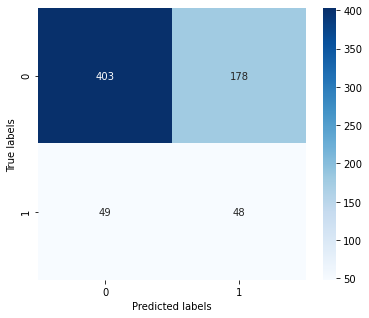

In [154]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v2)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 403 patients not to have risk of disease
#Classifier incorrectly predicted 178 patients to have risk of disease
#Classifier incorrectly predicted 49 patients not to have risk of disease
#Classifier correctly predicted 48 patients to have risk of disease

- k = 11

##### Training model

In [155]:
knn_11 = KNeighborsClassifier(n_neighbors=11, metric='euclidean')

In [156]:
knn_11.fit(X_train_v2, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

##### Prediction

In [157]:
y_pred_train_v2 = knn_11.predict(X_train_v2)
y_pred_v2 = knn_11.predict(X_test_v2)

In [158]:
print("Accuracy on train set:", accuracy_score(y_train_resampled, y_pred_train_v2))
print("\nAccuracy:", accuracy_score(y_test, y_pred_v2))
print("Classification Report:\n", classification_report(y_test, y_pred_v2))

Accuracy on train set: 0.7863359442993908

Accuracy: 0.616519174041298
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74       581
           1       0.20      0.55      0.29        97

    accuracy                           0.62       678
   macro avg       0.54      0.59      0.51       678
weighted avg       0.79      0.62      0.67       678



There is not that big difference between accuracy on training set and test set which may mean that model is not overfitted.

In [159]:
results.loc['version_2', 'KNN_11'] = round((accuracy_score(y_test, y_pred_v2))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,NaN,NaN
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,NaN,NaN,NaN


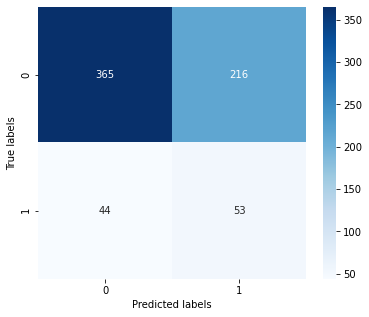

In [160]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v2)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 365 patients not to have risk of disease
#Classifier incorrectly predicted 216 patients to have risk of disease
#Classifier incorrectly predicted 44 patients not to have risk of disease
#Classifier correctly predicted 53 patients to have risk of disease

#### GridSearchCV

In [161]:
param_grid = {'n_neighbors':[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]
             }
knn = KNeighborsClassifier(metric='euclidean')

grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_v2, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy')

In [162]:
grid_search_df = pd.DataFrame(grid_search.cv_results_)
grid_search_df[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,{'n_neighbors': 1},0.921672,0.004646
1,{'n_neighbors': 2},0.911013,0.009481
2,{'n_neighbors': 3},0.854660,0.009653
3,{'n_neighbors': 4},0.828769,0.011558
4,{'n_neighbors': 5},0.795045,0.015703
5,{'n_neighbors': 6},0.773069,0.018793
6,{'n_neighbors': 7},0.747611,0.014847
7,{'n_neighbors': 8},0.741085,0.018357
8,{'n_neighbors': 9},0.733903,0.015353
9,{'n_neighbors': 10},0.735426,0.016651


In [163]:
grid_search.best_params_

{'n_neighbors': 1}

In [164]:
final_model_v2 = grid_search.best_estimator_

final_model_v2_params = final_model_v2.get_params()
final_training_v2 = final_model_v2.fit(X_train_v2,y_train_resampled)

Train set accuracy:

In [165]:
y_train_preds =  final_model_v2.predict(X_train_v2)

accuracy_score(y_train_resampled,y_train_preds)

1.0

Test set accuracy:

In [166]:
y_pred_v2 = final_model_v2.predict(X_test_v2)

# calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_v2)

print("Accuracy: {}".format(acc_score))
print("Classification Report:\n", classification_report(y_test, y_pred_v2))

Accuracy: 0.7728613569321534
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       581
           1       0.19      0.18      0.18        97

    accuracy                           0.77       678
   macro avg       0.53      0.52      0.52       678
weighted avg       0.77      0.77      0.77       678



The model has probably overfitted to training set.

In [167]:
results.loc['version_2', 'KNN'] = round((accuracy_score(y_test, y_pred_v2))*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,NaN,NaN
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,NaN,NaN


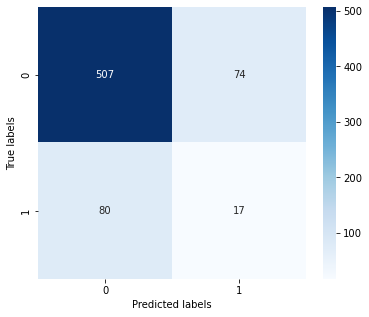

In [168]:
#confusion matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_v2)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#Classifier correctly predicted 507 patients not to have risk of disease
#Classifier incorrectly predicted 74 patients to have risk of disease
#Classifier incorrectly predicted 80 patients not to have risk of disease
#Classifier correctly predicted 17 patients to have risk of disease

#### 3.3.3 Comparison of models:

In [169]:
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,NaN,NaN
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,NaN,NaN


When using model of KNearestNeighbours the model with k = 3 has similar accuracy on both versions of dataset. However the model used on second version performed better for class 1. Model with k = 5 had better accuracy on second version of dataset and it better predicted class 1.  Model with k = 11 had higher accuracy on first version of dataset. Model created with using GridSearchCV with k = 1 also had higher accuracy on first version of dataset where PCA was used but it is probable that it has overfitted to training data.

### 3.4 Neural Network.

#### 3.4.1 Version 1 of Dataset (with PCA).

##### First network

In [170]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

In [177]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(9,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

 StratifiedShuffleSplit function enables spliting data into a training set and a validation set so that they are both representative of the original data, while also ensuring that the classes are evenly represented in both sets 

In [178]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_indices, val_indices = next(splitter.split(X_train_v1, y_train_resampled))

X_train, y_train = X_train_v1.iloc[train_indices], y_train_resampled.iloc[train_indices]
X_val, y_val = X_train_v1.iloc[val_indices], y_train_resampled.iloc[val_indices]

In [179]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [180]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose = 0)

In [181]:
pred_train= model.predict(X_train_v1)
scores = model.evaluate(X_train_v1, y_train_resampled, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test_v1)
scores2 = model.evaluate(X_test_v1, y_test, verbose=0) #[test loss, test accuracy]
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

144/144 [==============================] - 0s 753us/step
Accuracy on training data: 0.7204090356826782% 
 Error on training data: 0.2795909643173218
22/22 [==============================] - 0s 807us/step
Accuracy on test data: 0.6592920422554016% 
 Error on test data: 0.3407079577445984


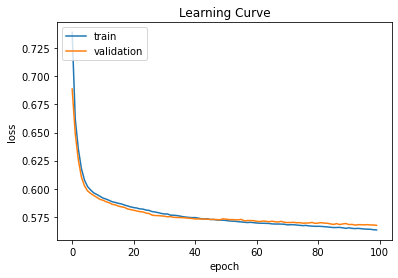

In [182]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [183]:
results.loc['version_1', 'Neural_Network_1'] = round(scores2[1]*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,65.93,NaN
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,NaN,NaN


##### Second network

In [184]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(9,)))
model.add(Dense(9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [185]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose = 0)

In [187]:
pred_train= model.predict(X_train_v1)
scores = model.evaluate(X_train_v1, y_train_resampled, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test_v1)
scores2 = model.evaluate(X_test_v1, y_test, verbose=0) #[test loss, test accuracy]
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

144/144 [==============================] - 0s 818us/step
Accuracy on training data: 0.7186684012413025% 
 Error on training data: 0.2813315987586975
22/22 [==============================] - 0s 939us/step
Accuracy on test data: 0.7256637215614319% 
 Error on test data: 0.2743362784385681


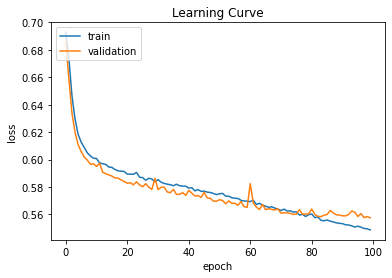

In [188]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [189]:
results.loc['version_1', 'Neural_Network_2'] = round(scores2[1]*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,65.93,72.57
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,NaN,NaN


##### Third network

In [191]:
model = Sequential()
model.add(Dense(16, activation='sigmoid', input_shape=(9,)))
model.add(Dense(1, activation='sigmoid'))

In [192]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [193]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose = 0)

In [194]:
pred_train= model.predict(X_train_v1)
scores = model.evaluate(X_train_v1, y_train_resampled, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test_v1)
scores2 = model.evaluate(X_test_v1, y_test, verbose=0) #[test loss, test accuracy]
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))  

144/144 [==============================] - 0s 764us/step
Accuracy on training data: 0.6812445521354675% 
 Error on training data: 0.31875544786453247
22/22 [==============================] - 0s 855us/step
Accuracy on test data: 0.6755162477493286% 
 Error on test data: 0.3244837522506714


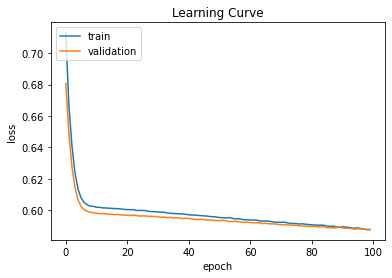

In [195]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [196]:
results.loc['version_1', 'Neural_Network_3'] = round(scores2[1]*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2,Neural_Network_3
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,65.93,72.57,67.55
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,NaN,NaN,NaN


#### 3.4.1 Version 2 of Dataset (only scaled).

##### First network

In [299]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(15,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [300]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_indices, val_indices = next(splitter.split(X_train_v2, y_train_resampled))

X_train, y_train = X_train_v2.iloc[train_indices], y_train_resampled.iloc[train_indices]
X_val, y_val = X_train_v2.iloc[val_indices], y_train_resampled.iloc[val_indices]

In [301]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [302]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose = 0)

In [303]:
pred_train= model.predict(X_train_v2)
scores = model.evaluate(X_train_v2, y_train_resampled, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test_v2)
scores2 = model.evaluate(X_test_v2, y_test, verbose=0) #[test loss, test accuracy]
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

144/144 [==============================] - 0s 769us/step
Accuracy on training data: 0.7236727476119995% 
 Error on training data: 0.2763272523880005
22/22 [==============================] - 0s 902us/step
Accuracy on test data: 0.7109144330024719% 
 Error on test data: 0.2890855669975281


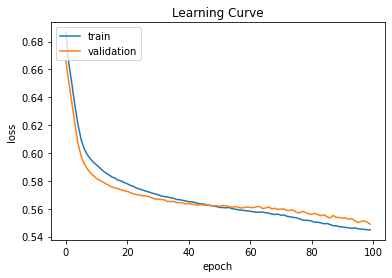

In [304]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [305]:
results.loc['version_2', 'Neural_Network_1'] = round(scores2[1]*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2,Neural_Network_3
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,65.93,72.57,67.55
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,71.09,NaN,NaN


##### Second network

In [316]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(15,)))
model.add(Dense(9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [317]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [318]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose = 0)

In [319]:
pred_train= model.predict(X_train_v2)
scores = model.evaluate(X_train_v2, y_train_resampled, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test_v2)
scores2 = model.evaluate(X_test_v2, y_test, verbose=0) #[test loss, test accuracy]
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))   

144/144 [==============================] - 0s 876us/step
Accuracy on training data: 0.7325935363769531% 
 Error on training data: 0.2674064636230469
22/22 [==============================] - 0s 950us/step
Accuracy on test data: 0.7138643264770508% 
 Error on test data: 0.2861356735229492


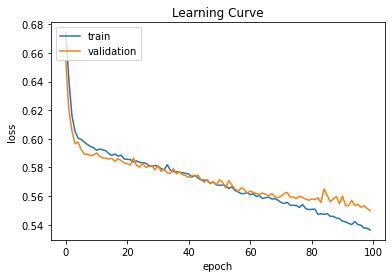

In [320]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [321]:
results.loc['version_2', 'Neural_Network_2'] = round(scores2[1]*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2,Neural_Network_3
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,65.93,72.57,67.55
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,71.09,71.39,NaN


##### Third model

In [322]:
model = Sequential()
model.add(Dense(16, activation='sigmoid', input_shape=(15,)))
model.add(Dense(1, activation='sigmoid'))

In [323]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [324]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose = 0)

In [325]:
pred_train= model.predict(X_train_v2)
scores = model.evaluate(X_train_v2, y_train_resampled, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test_v2)
scores2 = model.evaluate(X_test_v2, y_test, verbose=0) #[test loss, test accuracy]
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))   

144/144 [==============================] - 0s 797us/step
Accuracy on training data: 0.6908181309700012% 
 Error on training data: 0.3091818690299988
22/22 [==============================] - 0s 828us/step
Accuracy on test data: 0.6814159154891968% 
 Error on test data: 0.3185840845108032


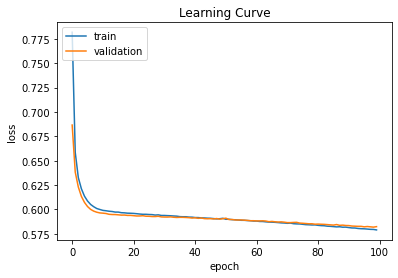

In [327]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [328]:
results.loc['version_2', 'Neural_Network_3'] = round(scores2[1]*100,2)
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2,Neural_Network_3
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,65.93,72.57,67.55
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,71.09,71.39,68.14


#### 3.4.3 Comparison of models:

In [329]:
results

,DecisionTree_1,DecisionTree_2,Naive_Bayes_1,Naive_Bayes_2,KNN_3,KNN_5,KNN_11,KNN,Neural_Network_1,Neural_Network_2,Neural_Network_3
version_1,73.3,67.26,73.75,74.48,70.65,64.01,63.27,78.47,65.93,72.57,67.55
version_2,76.84,66.96,81.86,79.35,70.94,66.52,61.65,77.29,71.09,71.39,68.14


When it comes to neural network it is a challange to choose number of hidden layers and neurons in it so that the model is not overfitted. I created three models of neural networks for each version of dataset: one model with two hidden layers, one model with 4 hidden layers and one model with one hidden layer. The first model had better accuracy on that version of dataset where PCA wasn't used on. The second model performed better on first version of dataset but by looking at learning curve I can't say if it wouldn't be better to let the training last longer because both curves for training and validation set are still decreasing. The third model with only one hidden layer had better accuracy for second version of dataset (without PCA). 

## 4. Bibliography.

https://www.kdnuggets.com/2023/04/best-machine-learning-model-sparse-data.html

https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron